# Iris

In [196]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
Y = iris.target

### 2. Określić typy poszczególnych atrybutów

https://www.wikiwand.com/en/Iris_flower_data_set

Wartości tylko ciągłe.

nr | atrybut | typ |
---|---------|-----|
1  | sepal length | ilościowy - ciągły |
2  | sepal width | ilościowy - ciągły |
3 | petal length | ilościowy - ciągły |
4 | petal width | ilościowy - ciągły |

In [197]:
X.dtype

dtype('float64')

### 3. Częstości atrybutów dyskretnych oraz średnie i odchylenia standardowe atrybutów ciągłych.

In [198]:
import numpy as np
import pandas as pd
columns = ['sepal_lenght','sepal_width', 'petal_length', 'petal_width']
df = pd.DataFrame(X, columns = columns,
                  index=Y)
df.mean()

sepal_lenght    5.843333
sepal_width     3.057333
petal_length    3.758000
petal_width     1.199333
dtype: float64

In [199]:
import statistics 
for index, name in enumerate(columns):
    stdev = statistics.stdev(X[:, index])
    print(f"Odchylenie standardowe dla {columns[index]} = {stdev}")
    mean = statistics.mean(X[:, index])
    print(f"Średnia dla {columns[index]} = {mean}")

Odchylenie standardowe dla sepal_lenght = 0.8280661279778629
Średnia dla sepal_lenght = 5.843333333333334
Odchylenie standardowe dla sepal_width = 0.4358662849366982
Średnia dla sepal_width = 3.0573333333333332
Odchylenie standardowe dla petal_length = 1.7652982332594664
Średnia dla petal_length = 3.758
Odchylenie standardowe dla petal_width = 0.7622376689603465
Średnia dla petal_width = 1.1993333333333334


### 4. Histogramy i wykresy budełkowe dla wybranych atrybutów ciągłych

Text(0.5, 1.0, 'Histogram dla sepal_lenght')

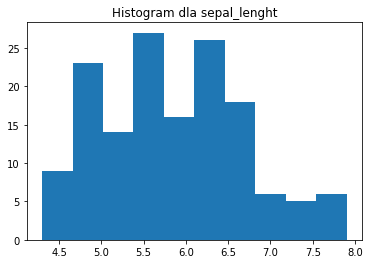

In [200]:
from matplotlib import pyplot as plt
plt.hist(X[:, 0])
plt.title(f'Histogram dla {columns[0]}')

Text(0.5, 1.0, 'Wykres pudełkowy')

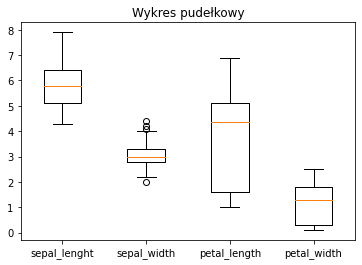

In [201]:
plt.boxplot(X[:], labels=columns)
plt.title(f'Wykres pudełkowy')

### 5. Dokonać transformacji metodą PCA

In [202]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

pca = PCA(n_components=3)
pca.fit(iris.data)
pca.explained_variance_ratio_

array([0.92461872, 0.05306648, 0.01710261])

### 6. Wybranie składowych głównych

In [203]:
def select_components(variance_ratio):
    sum = 0
    selected_components = []
    for index, ratio in enumerate(variance_ratio):
        sum += ratio
        selected_components.append(index)
        if sum > 0.9:
            return selected_components
        
components = select_components(pca.explained_variance_ratio_)

### 7. Zwizualizować dane w rzucie na dwie i trzy pierwsze składowe główne

Text(0.5, 1.0, 'Pierwsze dwie składowe główne')

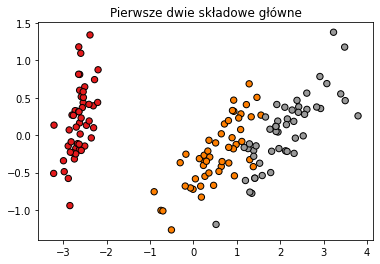

In [204]:
fig, ax = plt.subplots() 
X_reduced = PCA(n_components=2).fit_transform(iris.data)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], c=Y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("Pierwsze dwie składowe główne")

Text(0.5, 0.92, 'Pierwsze trzy składowe główne')

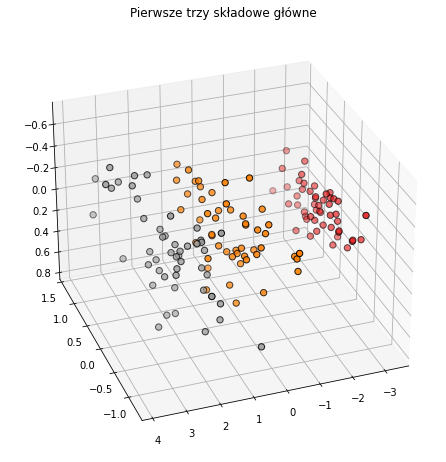

In [205]:
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=Y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("Pierwsze trzy składowe główne")

### 8. Porównać jaka jest jakość wizualizacji w porównaniu z losową dwu wymiarową projekcją danych oryginalnych

Text(0, 0.5, 'sepal_width')

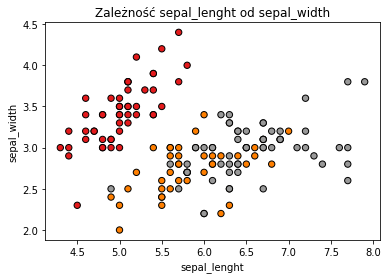

In [206]:
fig, ax = plt.subplots() 
ax.scatter(X[:, 0], X[:, 1], c=Y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title(f"Zależność {columns[0]} od {columns[1]}")
ax.set_xlabel(columns[0])
ax.set_ylabel(columns[1])

# Autos

In [207]:
import pandas as pd
df = pd.read_csv('data/autos.csv')

### 2. Określić typy poszczególnych atrybutów

In [208]:
df.dtypes

Unnamed: 0             int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight          float64
engine-type           object
num-of-cylinders      object
engine-size          float64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg             float64
highway-mpg          float64
price                float64
symboling              int64
dtype: object

### 3. Podać częstości atrybutów dyskretnych oraz średnie i odchylenia standardowe atrybutów ciągłych.

In [209]:
df.mean()

Unnamed: 0             102.000000
normalized-losses      122.000000
wheel-base              98.756585
length                 174.049268
width                   65.907805
height                  53.724878
curb-weight           2555.565854
engine-size            126.907317
bore                     3.329751
stroke                   3.255423
compression-ratio       10.142537
horsepower             104.256158
peak-rpm              5125.369458
city-mpg                25.219512
highway-mpg             30.751220
price                13207.129353
symboling                0.834146
dtype: float64

In [210]:
discrete_columns = []
for column in list(df.columns):
    if df[column].dtype == 'object':
        discrete_columns.append(column)
        
for column in discrete_columns:
    print(f'{column}')
    print(df[column].value_counts())
    print()

make
toyota           32
nissan           18
mazda            17
honda            13
mitsubishi       13
subaru           12
volkswagen       12
peugot           11
volvo            11
dodge             9
bmw               8
mercedes-benz     8
audi              7
plymouth          7
saa               6
porsche           5
isuzu             4
chevrolet         3
alfa-romero       3
jaguar            3
renault           2
mercury           1
Name: make, dtype: int64

fuel-type
gas       185
diesel     20
Name: fuel-type, dtype: int64

aspiration
std      168
turbo     37
Name: aspiration, dtype: int64

num-of-doors
four    114
two      89
?         2
Name: num-of-doors, dtype: int64

body-style
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: body-style, dtype: int64

drive-wheels
fwd    120
rwd     76
4wd      9
Name: drive-wheels, dtype: int64

engine-location
front    202
rear       3
Name: engine-location, dtype: int64

engine-type
ohc 

### 4. Wykreślić histogramy i wykresy pudełkowe dla wybranych atrybutów ciągłych

Text(0.5, 1.0, 'Histogram dla length')

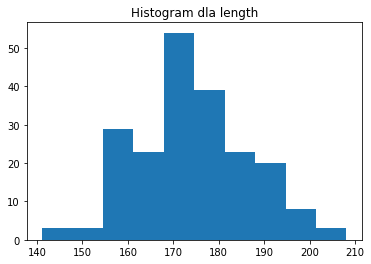

In [211]:
from matplotlib import pyplot as plt
chosen_columns = ['length', 'width', 'horsepower', 'city-mpg']
plt.hist(df[chosen_columns[0]])
plt.title(f'Histogram dla {chosen_columns[0]}')

<AxesSubplot:>

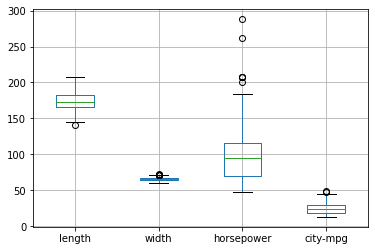

In [212]:
chosen_columns = ['length', 'width', 'horsepower', 'city-mpg']
df[chosen_columns].boxplot()

### Kolejne kroki dla chętnych w AUTOS

# ZOO

In [213]:
df = pd.read_csv('data/zoo.csv')

### 2. Określić typy poszczególnych atrybutów

In [214]:
df.dtypes

animal      object
hair          bool
feathers      bool
eggs          bool
milk          bool
airborne      bool
aquatic       bool
predator      bool
toothed       bool
backbone      bool
breathes      bool
venomous      bool
fins          bool
legs         int64
tail          bool
domestic      bool
catsize       bool
type        object
dtype: object

### 3. Podać częstości atrybutów dyskretnych oraz średnie i odchylenia standardowe atrybutów ciągłych.

In [215]:
discrete_columns = []
for column in list(df.columns):
    if df[column].dtype in ['object', 'bool', 'int64']:
        discrete_columns.append(column)
        
for column in discrete_columns:
    print(f'{column}')
    print(df[column].value_counts())
    print()

animal
frog        2
gnat        1
newt        1
hare        1
mole        1
           ..
housefly    1
wallaby     1
elephant    1
platypus    1
skua        1
Name: animal, Length: 100, dtype: int64

hair
False    58
True     43
Name: hair, dtype: int64

feathers
False    81
True     20
Name: feathers, dtype: int64

eggs
True     59
False    42
Name: eggs, dtype: int64

milk
False    60
True     41
Name: milk, dtype: int64

airborne
False    77
True     24
Name: airborne, dtype: int64

aquatic
False    65
True     36
Name: aquatic, dtype: int64

predator
True     56
False    45
Name: predator, dtype: int64

toothed
True     61
False    40
Name: toothed, dtype: int64

backbone
True     83
False    18
Name: backbone, dtype: int64

breathes
True     80
False    21
Name: breathes, dtype: int64

venomous
False    93
True      8
Name: venomous, dtype: int64

fins
False    84
True     17
Name: fins, dtype: int64

legs
4    38
2    27
0    23
6    10
8     2
5     1
Name: legs, dtype: int64


### 4. Histogramy i wykresy budełkowe dla wybranych atrybutów ciągłych

W zbiorze zoo nie ma atrybutów ciągłych.

Text(0.5, 1.0, 'Histogram dla sepal_lenght')

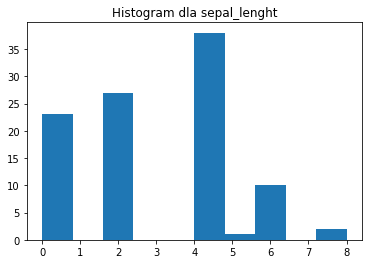

In [216]:
from matplotlib import pyplot as plt
plt.hist(df['legs'])
plt.title(f'Histogram dla {columns[0]}')

### 5. Dokonać transformacji metodą PCA

In [217]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D


Y = df['type'].to_list()
X = df.iloc[:, 1:17].to_numpy()


pca = PCA()
pca.fit(X)
pca.explained_variance_ratio_

array([6.25615480e-01, 1.44969052e-01, 7.25316892e-02, 3.90853591e-02,
       2.52571291e-02, 2.12712117e-02, 1.49124811e-02, 1.36876986e-02,
       1.06283642e-02, 9.59018109e-03, 8.16760981e-03, 5.38981516e-03,
       4.28633321e-03, 2.99551097e-03, 1.10195811e-03, 5.10126551e-04])

### 6. Wybranie składowych głównych

In [218]:
def select_components(variance_ratio):
    sum = 0
    selected_components = []
    for index, ratio in enumerate(variance_ratio):
        sum += ratio
        selected_components.append(index)
        if sum > 0.9:
            return selected_components
        
components = select_components(pca.explained_variance_ratio_)

### 7. Zwizualizować dane w rzucie na dwie i trzy pierwsze składowe główne

In [219]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(Y)
Y_labels = le.transform(Y)

Text(0.5, 1.0, 'Pierwsze dwie składowe główne')

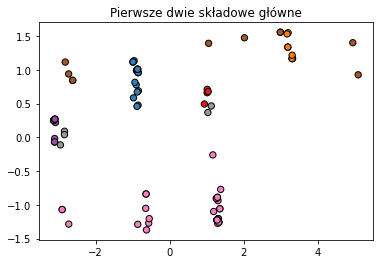

In [220]:
fig, ax = plt.subplots() 
X_reduced = PCA(n_components=2).fit_transform(X)

# zamienic Y na klasy

ax.scatter(X_reduced[:, 0], X_reduced[:, 1], c=Y_labels,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("Pierwsze dwie składowe główne")

Text(0.5, 0.92, 'Pierwsze trzy składowe główne')

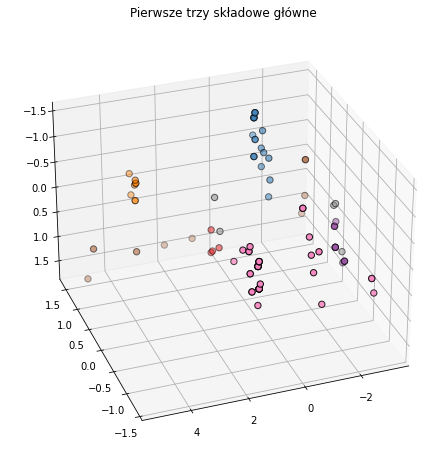

In [221]:
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(X)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=Y_labels,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("Pierwsze trzy składowe główne")

### 8. Porównać jaka jest dokładność wizualizacji w porównaniu z losową dwu lub trzywymiarową projekcją danych oryginalnych

Text(0, 0.5, 'sepal_width')

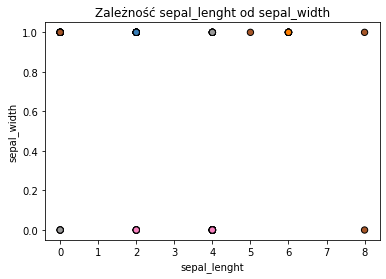

In [222]:
fig, ax = plt.subplots() 
ax.scatter(df.loc[:, 'legs'], df.loc[:, 'eggs'], c=Y_labels,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title(f"Zależność {columns[0]} od {columns[1]}")
ax.set_xlabel(columns[0])
ax.set_ylabel(columns[1])